In [54]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

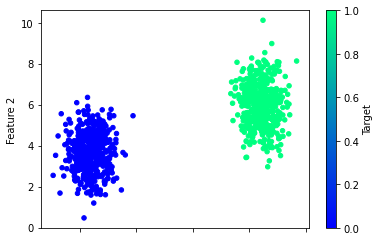

In [55]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [56]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [57]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [58]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [59]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [60]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [61]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [63]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5136 - accuracy: 0.9240
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.9453
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4918 - accuracy: 0.9453
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.9480
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4703 - accuracy: 0.9480
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4598 - accuracy: 0.9493
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.9493
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.9493
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.9520
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.9533
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.0972 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0956 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0940 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0910 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0895 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0881 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0867 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0854 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 1.0000
Epoch 92/100


<AxesSubplot:>

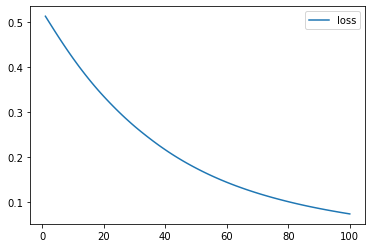

In [64]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

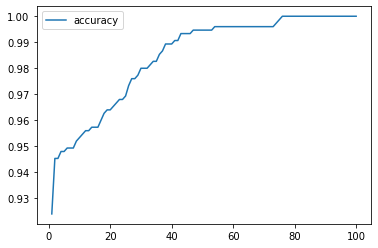

In [65]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [66]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0741 - accuracy: 1.0000 - 101ms/epoch - 13ms/step
Loss: 0.07406490296125412, Accuracy: 1.0


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

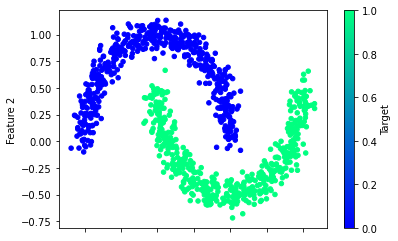

In [67]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [68]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [69]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2653 - accuracy: 0.4307
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1183 - accuracy: 0.4493
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0180 - accuracy: 0.4733
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9537 - accuracy: 0.4867
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9048 - accuracy: 0.4920
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8651 - accuracy: 0.5067
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8335 - accuracy: 0.5187
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8065 - accuracy: 0.5333
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7825 - accuracy: 0.5440
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7615 - accuracy: 0.5613
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8680
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3038 - accuracy: 0.8693
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.8693
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.8693
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2993 - accuracy: 0.8693
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.8693
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8707
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2953 - accuracy: 0.8720
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.8760
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2929 - accuracy: 0.8773
Epoch 93/100


<AxesSubplot:>

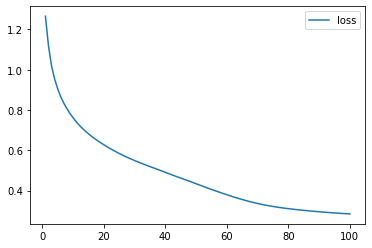

In [70]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

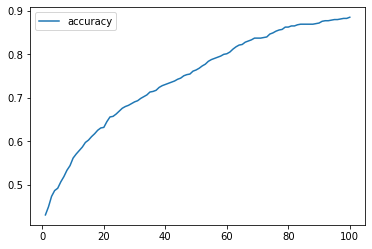

In [71]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [72]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [73]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [74]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7810 - accuracy: 0.3533
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7383 - accuracy: 0.3840
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6993 - accuracy: 0.4120
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.4387
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6266 - accuracy: 0.5173
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5936 - accuracy: 0.5827
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5627 - accuracy: 0.6680
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5331 - accuracy: 0.7227
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5060 - accuracy: 0.7667
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4807 - accuracy: 0.7960
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.1845 - accuracy: 0.9240
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1832 - accuracy: 0.9253
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1818 - accuracy: 0.9253
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1805 - accuracy: 0.9253
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1791 - accuracy: 0.9253
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1777 - accuracy: 0.9253
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1764 - accuracy: 0.9267
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1751 - accuracy: 0.9267
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1736 - accuracy: 0.9267
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1722 - accuracy: 0.9267
Epoch 93/100
